# Data preparation

In [7]:
import os
import cv2
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

def load_data(base_dir):
    X = []  
    y = []  

    # List the subdirectories in the training directory
    classes = os.listdir(os.path.join(base_dir, 'train'))

    for class_name in classes:
        class_path = os.path.join(base_dir, 'train', class_name)

        # Iterate over each file in the current class directory
        for filename in os.listdir(class_path):
            if filename.endswith(".jpg"):
                # Construct the full path to the image
                img_path = os.path.join(class_path, filename)

                # Read the image using OpenCV
                img = cv2.imread(img_path)

                # Resize the image to a standard size (e.g., 224x224)
                img = cv2.resize(img, (224, 224))

                # Append the image to the X list
                X.append(img)

                # Append the label to the y list
                # Here, the label is the index of the class in the 'classes' list
                y.append(classes.index(class_name))

    # Convert the labels to numerical values using LabelEncoder
    le = LabelEncoder()
    y = le.fit_transform(y)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Return the training and testing data along with their labels and classes
    return np.array(X_train), np.array(X_test), np.array(y_train), np.array(y_test), classes


In [8]:
base_directory = "C:\\Food-101-minimized"
X_train, X_test, y_train, y_test, classes = load_data(base_directory)

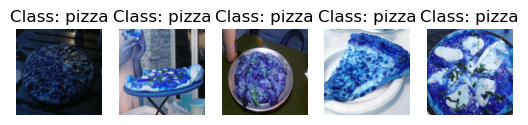

In [9]:
import matplotlib.pyplot as plt


class_to_display = "pizza"
class_index = classes.index(class_to_display)

# Get indices of images belonging to class 5 in the training set
class_5_indices = np.where(y_train == class_index)[0]

# Display 5 images from class 5
for i in range(5):
    img_index = class_2_indices[i]
    image = X_train[img_index]

    plt.subplot(1, 5, i + 1)
    plt.imshow(image)
    plt.title(f"Class: {class_to_display}")
    plt.axis("off")

plt.show()


# Preprocess images

In [16]:
import cv2
import numpy as np

# Preprocess images
def preprocess_images(X):
    # Resize the images to a fixed size
    X_resized = [cv2.resize(img, (64, 64)) for img in X]

    # Convert the resized images to grayscale
    X_gray = [cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in X_resized]

    # Apply Histogram of Oriented Gradients (HOG) feature extraction
    X_hog = []
    block_size = (16, 16)  # Adjust the block size as needed
    hog = cv2.HOGDescriptor(_winSize=(64, 64), _blockSize=(block_size[1], block_size[0]),
                            _blockStride=(8, 8), _cellSize=(8, 8), _nbins=9)
    for img in X_gray:
        hog_features = hog.compute(img)
        X_hog.append(hog_features)

    # Normalize HOG features
    X_hog_normalized = X_hog / np.linalg.norm(X_hog, axis=1, keepdims=True)

    # Convert the feature vectors to numpy arrays
    X_hog_normalized = np.array(X_hog_normalized)

    return X_resized, X_gray, X_hog_normalized



In [17]:
# Preprocess the training images
X_train_resized, X_train_gray, X_train_hog = preprocess_images(X_train)

# Flatten the images
X_train_flattened = np.array(X_train_gray).reshape(len(X_train_gray), -1)

# Normalize the pixel values
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train_flattened)

# Build the Logistic Regression model with increased max_iter
logistic_regression_model = LogisticRegression(random_state=42, max_iter=2000)

# Train the model
logistic_regression_model.fit(X_train_normalized, y_train)

# Preprocess the test images
X_test_resized, X_test_gray, X_test_hog = preprocess_images(X_test)

# Flatten, normalize, and predict on the test set
X_test_flattened = np.array(X_test_gray).reshape(len(X_test_gray), -1)
X_test_normalized = scaler.transform(X_test_flattened)
y_pred = logistic_regression_model.predict(X_test_normalized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.24142857142857144


In [20]:
import cv2
import numpy as np

# Load and preprocess the new image
def preprocess_single_image(img_path):
    # Read the image using OpenCV
    img = cv2.imread(img_path)

    if img is None:
        print(f"Error: Unable to read the image at path {img_path}")
        return None, None, None

    # Resize the image to the required size
    img_resized = cv2.resize(img, (64, 64))

    # Convert the resized image to grayscale
    img_gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)

    # Apply Histogram of Oriented Gradients (HOG) feature extraction
    block_size = (16, 16)
    hog = cv2.HOGDescriptor(_winSize=(64, 64), _blockSize=(block_size[1], block_size[0]),
                            _blockStride=(8, 8), _cellSize=(8, 8), _nbins=9)
    hog_features = hog.compute(img_gray).reshape(1, -1)

    return img_resized, img_gray, hog_features

# Path to the new image you want to classify
new_image_path = "C:\\Food-101-minimized\\test\\cheesecake\\1004515.jpg"

# Preprocess the new image
new_img_resized, new_img_gray, new_img_hog = preprocess_single_image(new_image_path)

# Check if the image was successfully loaded
if new_img_resized is not None:
    # Flatten and normalize the feature vector
    new_img_flattened = new_img_gray.reshape(1, -1)
    new_img_normalized = scaler.transform(new_img_flattened)

    # Predict the class label using the trained model
    predicted_class = logistic_regression_model.predict(new_img_normalized)

    # Map the predicted class index to the corresponding class name
    predicted_class_name = classes[predicted_class[0]]

    # Display the original image
    cv2.imshow("Original Image", new_img_resized)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

    # Print the predicted class name
    print("Predicted Class:", predicted_class_name)


Predicted Class: cheesecake
